#### Importing the Dependencies :

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### data collection and processing :

In [56]:
df=pd.read_csv('C:\\Users\\HP\\Downloads\\titanic\\train.csv')

In [57]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.shape

(891, 12)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling the missing values :

In [61]:
df=df.drop(columns='Cabin',axis=1) # since most of the data of cabin is not present

In [62]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [66]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

#### Data Analysis :

In [68]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Data Visualization :

<AxesSubplot:xlabel='Survived', ylabel='count'>

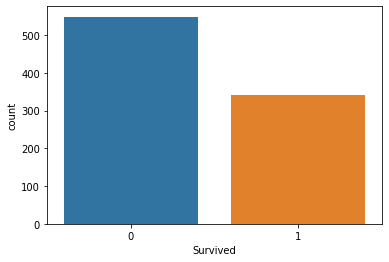

In [70]:
sns.countplot(x='Survived',data=df)

In [72]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

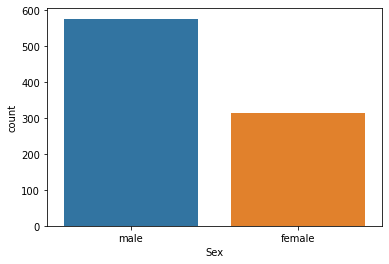

In [71]:
sns.countplot(x='Sex',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

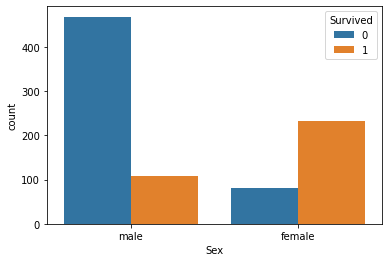

In [73]:
sns.countplot(x='Sex',data=df,hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

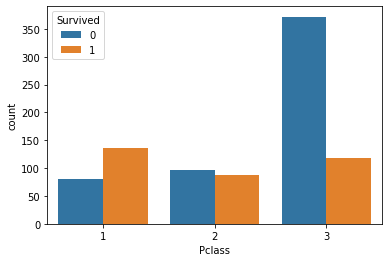

In [80]:
sns.countplot(x='Pclass',data=df,hue='Survived')

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

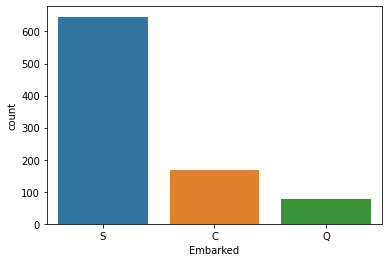

In [81]:
sns.countplot(df['Embarked'])

Encoding the categorical column :

In [82]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [83]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [86]:
df.replace({'Sex': {'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

feature and target split :

In [88]:
x=df.drop(columns=['Survived','PassengerId','Name','Ticket'],axis=1)

In [89]:
y=df['Survived']

train test split :

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [92]:
x_train.shape,x_test.shape,x.shape

((712, 7), (179, 7), (891, 7))

Model Training :

In [99]:
from sklearn.linear_model import LogisticRegression

In [102]:
log_reg=LogisticRegression(max_iter=100)

In [103]:
log_reg.fit(x_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation :

In [97]:
from sklearn.metrics import accuracy_score

In [106]:
train_accuracy_score=accuracy_score(y_train,log_reg.predict(x_train))
print(train_accuracy_score)

0.8075842696629213


In [107]:
test_accuracy_score=accuracy_score(y_test,log_reg.predict(x_test))
print(test_accuracy_score)

0.7821229050279329
